# Lapidario

In [6]:
import os
import zipfile
import pandas as pd
import numpy as np
from six.moves import urllib

#metodo para descargar y descomprimir archivos zip

def download_lap_data(lap_url, lap_path):
    if not os.path.isdir(lap_path):
        os.makedirs(lap_path)
    zip_path = os.path.join(lap_path, "diamonds.zip")
    urllib.request.urlretrieve(lap_url, zip_path)
    lap_zip = zipfile.ZipFile(zip_path)
    lap_zip.extractall(path=lap_path)
    
#metodo para leer archivo tipo csv
    
def read_lap_data(lap_path, lap_name):
    csv_path = os.path.join(lap_path, lap_name)
    return pd.read_csv(csv_path)

In [6]:
#manda llamar al metodo para descargar los datos desde una url
download_lap_data("https://s3.us-east-2.amazonaws.com/recruiting-datasets/diamonds.zip", os.path.join("dataset"))

# Validacion de datos

In [7]:
#lee el set de datos y se muestran algunos valores
lapidarist = read_lap_data(os.path.join("dataset"  + "/diamonds"), "diamonds_data.csv" )
lapidarist.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
#muestra estructura de los datos (tipo de dato, numero de columnas y numero de datos por columna)
lapidarist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53930 non-null  float64
 1   cut      53930 non-null  object 
 2   color    53930 non-null  object 
 3   clarity  53930 non-null  object 
 4   depth    53930 non-null  float64
 5   table    53930 non-null  float64
 6   price    53930 non-null  int64  
 7   x        53930 non-null  float64
 8   y        53930 non-null  float64
 9   z        53930 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
#muestra algunas caracteristicas de los datos
lapidarist.describe()

,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797976,61.749325,57.457328,3933.054942,5.731236,5.734601,3.538776
std,0.474035,1.432711,2.234578,3989.628569,1.121807,1.142184,0.705729
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Visualizacion grafica de datos

<AxesSubplot:xlabel='clarity', ylabel='price'>

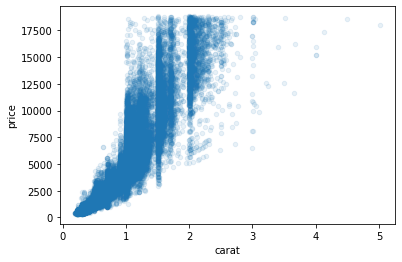

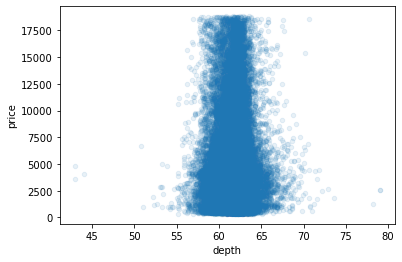

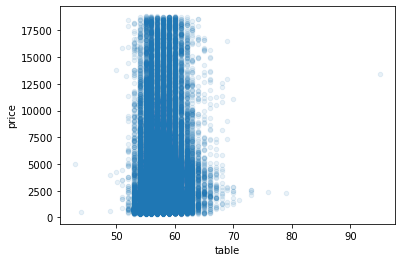

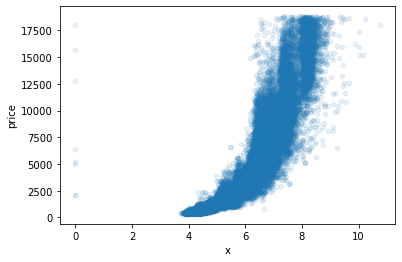

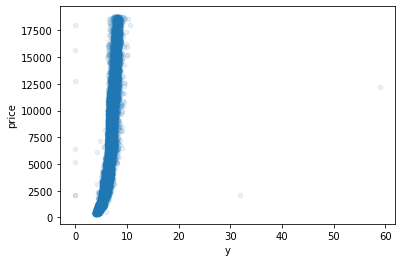

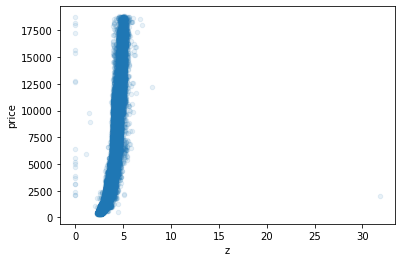

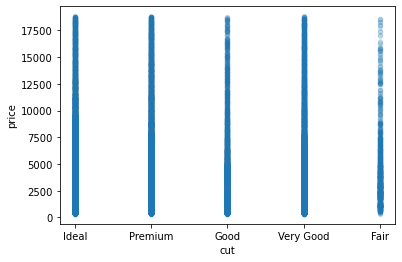

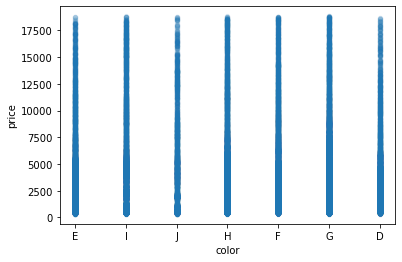

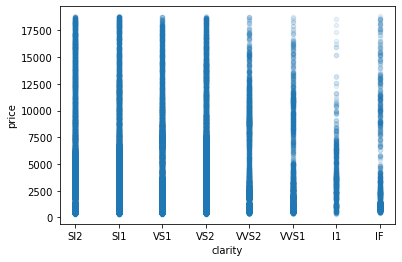

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

#graficas de caracteristicas vs precio

lapidarist.plot(kind="scatter", x="carat", y="price", alpha=0.1)
lapidarist.plot(kind="scatter", x="depth", y="price", alpha=0.1)
lapidarist.plot(kind="scatter", x="table", y="price", alpha=0.1)
lapidarist.plot(kind="scatter", x="x", y="price", alpha=0.1)
lapidarist.plot(kind="scatter", x="y", y="price", alpha=0.1)
lapidarist.plot(kind="scatter", x="z", y="price", alpha=0.1)
lapidarist.plot(kind="scatter", x="cut", y="price", alpha=0.1)
lapidarist.plot(kind="scatter", x="color", y="price", alpha=0.1)
lapidarist.plot(kind="scatter", x="clarity", y="price", alpha=0.1)

In [11]:
lapid = lapidarist.copy()

# Modelado

In [302]:
#se crean sets de datos para prueba y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(lapid[["carat","depth","table","x","y","z","cut","color","clarity"]], 
                                                     lapid["price"], test_size=0.2, random_state=42)

In [283]:
#tamaño de los sets
len(train)

43144

In [286]:
len(test)

10786

In [15]:
#matriz de correlacion lineal
corr_matrix = lapid.corr()

In [16]:
#que valores se relacionan mas con el precio
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.921590
x        0.884431
y        0.865416
z        0.861245
table    0.127168
depth   -0.010633
Name: price, dtype: float64

In [304]:
#modelo de regresion lineal
from sklearn.linear_model import LinearRegression 

feature_cols = ["carat"]
x_test = X_test[feature_cols]
x_train = X_train[feature_cols]           
lin_reg = LinearRegression()
lin_reg.fit(x_train, Y_train)

LinearRegression()

In [305]:
#crea nueva columna con valores de regresion lineal en el set de pruebas
test["predic_lin"] = lin_reg.predict(test[["carat"]])

<ipython-input-305-1a1e718b9bbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predic_lin"] = lin_reg.predict(test[["carat"]])


In [306]:
#coeficiente de determinacion
lin_reg.score(x_train,Y_train)

0.847632782481173

In [307]:
#raiz del error cuadratico medio para regresion lineal
from sklearn.metrics import mean_squared_error
cost = lin_reg.predict(x_train)
lin_mse = mean_squared_error(Y_train, cost)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1562.8016139550866

In [308]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [309]:
#validacion para 10 valores en regresion lineal
lin_scores = cross_val_score(lin_reg, x_train, Y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1547.46303976 1575.88553238 1544.91280782 1538.45213163 1591.37636637
 1546.80986587 1628.54650407 1538.69749154 1500.89098101 1612.97810375]
Mean: 1562.601282420827
Standard deviation: 36.9394430139873


In [310]:
#modelo arbol de desiciones
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, Y_train)

DecisionTreeRegressor()

In [311]:
#crea nueva columna con valores de regresion lineal en el set de pruebas
test["predic_tree"] = tree_reg.predict(test[["carat"]])

<ipython-input-311-ade384039bbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predic_tree"] = tree_reg.predict(test[["carat"]])


In [312]:
#coeficiente de determinacion
tree_reg.score(x_train,Y_train)

0.8748534804765188

In [313]:
#raiz del error cuadratico medio para arbol
from sklearn.metrics import mean_squared_error
cost = tree_reg.predict(x_train)
lin_mse = mean_squared_error(Y_train, cost)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1416.3398371618766

In [314]:
#validacion para 10 valores en regresion lineal
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, x_train, Y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [1441.90934005 1455.636786   1446.50433405 1421.9520864  1442.79592514
 1383.73410371 1541.80618926 1383.8506654  1407.59802279 1494.60499075]
Mean: 1442.039244353464
Standard deviation: 46.14879456566654


In [315]:
#modelo regresion polinomial
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x_train)
lin2_reg = LinearRegression()
lin2_reg.fit(X_poly, Y_train)

LinearRegression()

In [316]:
#crea nueva columna con valores de regresion polinomial en el set de pruebas
test["predic_lin2"] = lin2_reg.predict(poly_features.fit_transform(test[["carat"]]))

<ipython-input-316-3e7675304c6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predic_lin2"] = lin2_reg.predict(poly_features.fit_transform(test[["carat"]]))


In [317]:
#coeficiente de determinacion
lin2_reg.score(X_poly,Y_train)

0.8489726864978453

In [318]:
#raiz del error cuadratico medio para polinomial
from sklearn.metrics import mean_squared_error
cost = lin2_reg.predict(X_poly)
lin_mse = mean_squared_error(Y_train, cost)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1555.914869646454

In [319]:
#validacion para 10 valores en regresion polinomial
lin_scores = cross_val_score(lin2_reg, X_poly, Y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1530.59588037 1561.44356051 1525.11444888 1520.40408915 1597.78395371
 1571.41531831 1617.74672372 1556.90778991 1490.77699709 1604.69530685]
Mean: 1557.6884068504223
Standard deviation: 39.10213091539103


In [320]:
test.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,predic_lin,predic_tree,predic_lin2
34222,0.40,Premium,H,SI1,62.8,59.0,855,4.69,4.67,2.94,848.086206,940.028249,914.054991
30645,0.40,Ideal,I,VS1,61.9,57.0,736,4.73,4.74,2.93,848.086206,940.028249,914.054991
48886,0.56,Very Good,E,VVS2,62.1,58.0,2040,5.27,5.33,3.30,2090.729716,1831.033163,2071.716788
43004,0.42,Ideal,E,VVS1,59.7,56.0,1369,4.91,4.88,2.92,1003.416644,999.595782,1057.488320
29996,0.43,Ideal,E,SI2,61.9,57.0,716,4.83,4.86,3.00,1081.081864,995.180905,1129.341527
40797,0.41,Good,E,VVS1,60.4,61.0,1169,4.76,4.81,2.89,925.751425,975.059397,985.726141
22090,1.25,Ideal,D,VS2,62.6,56.0,10114,6.87,6.84,4.29,7449.629856,7018.156863,7331.073516
14073,1.03,Premium,E,SI1,62.9,56.0,5710,6.49,6.39,4.05,5740.995029,5537.577017,5607.115583
39075,0.38,Very Good,F,VVS2,61.9,59.7,1060,4.64,4.65,2.87,692.755767,906.465028,770.985774
19315,1.41,Ideal,H,SI2,62.0,56.0,8030,7.17,7.24,4.47,8692.273367,9627.212121,8612.533678
